# 1. DATA EXPLORATION

In [69]:
# Importing necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [71]:
#Loading the datset
youtubers_df=pd.read_csv("/content/drive/MyDrive/Intern Career/Task 1/youtubers_df.csv")
youtubers_df

,Rank,Username,Categories,Suscribers,Country,Visits,Likes,Comments,Links
0,1,tseries,Música y baile,249500000.0,India,86200.0,2700.0,78.0,http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...
1,2,MrBeast,"Videojuegos, Humor",183500000.0,Estados Unidos,117400000.0,5300000.0,18500.0,http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...
2,3,CoComelon,Educación,165500000.0,Unknown,7000000.0,24700.0,0.0,http://youtube.com/channel/UCbCmjCuTUZos6Inko4...
3,4,SETIndia,NaN,162600000.0,India,15600.0,166.0,9.0,http://youtube.com/channel/UCpEhnqL0y41EpW2TvW...
4,5,KidsDianaShow,"Animación, Juguetes",113500000.0,Unknown,3900000.0,12400.0,0.0,http://youtube.com/channel/UCk8GzjMOrta8yxDcKf...
...,...,...,...,...,...,...,...,...,...
995,996,hamzymukbang,NaN,11700000.0,Estados Unidos,397400.0,14000.0,124.0,http://youtube.com/channel/UCPKNKldggioffXPkSm...
996,997,Adaahqueen,NaN,11700000.0,India,1100000.0,92500.0,164.0,http://youtube.com/channel/UCk3fFpqI5kDMf__mUP...
997,998,LittleAngelIndonesia,Música y baile,11700000.0,Unknown,211400.0,745.0,0.0,http://youtube.com/channel/UCdrHrQf0o0TO8YDntX...
998,999,PenMultiplex,NaN,11700000.0,India,14000.0,81.0,1.0,http://youtube.com/channel/UCObyBrdrtQ20BU9PxH...


In [72]:
youtubers_df.shape

(1000, 9)

In [73]:
youtubers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        1000 non-null   int64  
 1   Username    1000 non-null   object 
 2   Categories  694 non-null    object 
 3   Suscribers  1000 non-null   float64
 4   Country     1000 non-null   object 
 5   Visits      1000 non-null   float64
 6   Likes       1000 non-null   float64
 7   Comments    1000 non-null   float64
 8   Links       1000 non-null   object 
dtypes: float64(4), int64(1), object(4)
memory usage: 70.4+ KB


In [74]:
youtubers_df.describe()

,Rank,Suscribers,Visits,Likes,Comments
count,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1000.000000
mean,500.500000,2.189440e+07,1.209446e+06,5.363259e+04,1288.768000
std,288.819436,1.682775e+07,5.229942e+06,2.580457e+05,6778.188308
min,1.000000,1.170000e+07,0.000000e+00,0.000000e+00,0.000000
25%,250.750000,1.380000e+07,3.197500e+04,4.717500e+02,2.000000
50%,500.500000,1.675000e+07,1.744500e+05,3.500000e+03,67.000000
75%,750.250000,2.370000e+07,8.654750e+05,2.865000e+04,472.000000
max,1000.000000,2.495000e+08,1.174000e+08,5.300000e+06,154000.000000


### Dealing with Missing Values

In [75]:
youtubers_df.isnull().sum()

Rank            0
Username        0
Categories    306
Suscribers      0
Country         0
Visits          0
Likes           0
Comments        0
Links           0
dtype: int64

In [76]:
youtubers_df.fillna('Educación', inplace=True)

In [77]:
youtubers_df.isnull().sum()

Rank          0
Username      0
Categories    0
Suscribers    0
Country       0
Visits        0
Likes         0
Comments      0
Links         0
dtype: int64

In [78]:
youtubers_df.duplicated().sum()

0

In [79]:
category_counts = youtubers_df['Categories'].value_counts()
print(category_counts)

Educación                             330
Música y baile                        160
Películas, Animación                   61
Música y baile, Películas              41
Vlogs diarios                          37
Noticias y Política                    36
Películas, Humor                       34
Animación, Videojuegos                 34
Animación, Juguetes                    29
Animación, Humor                       27
Películas                              24
Animación                              22
Videojuegos                            19
Videojuegos, Humor                     17
Música y baile, Animación              16
Ciencia y tecnología                   14
Comida y bebida                        12
Humor                                  10
Juguetes                               10
Películas, Juguetes                     9
Deportes                                8
Películas, Videojuegos                  8
Música y baile, Humor                   6
Juguetes, Coches y vehículos      

# 2. TREND ANALYSIS

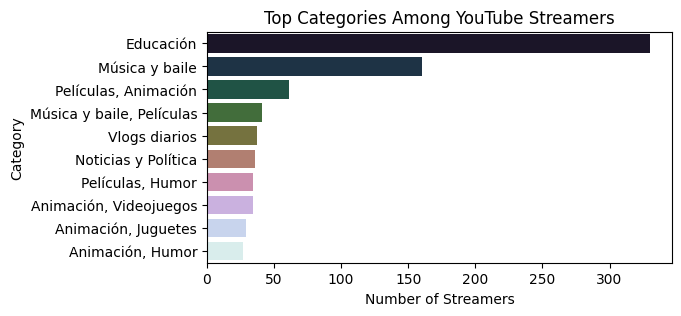

In [80]:
# Create a bar plot of the top categories
top_categories = youtubers_df['Categories'].value_counts().head(10)
plt.figure(figsize=(6, 3))
sns.barplot(x=top_categories.values, y=top_categories.index, palette="cubehelix")
plt.xlabel('Number of Streamers')
plt.ylabel('Category')
plt.title('Top Categories Among YouTube Streamers')
plt.show()

Correlation between Subscribers and Likes:             Suscribers     Likes  Comments
Suscribers    1.000000  0.211639  0.036350
Likes         0.211639  1.000000  0.325911
Comments      0.036350  0.325911  1.000000


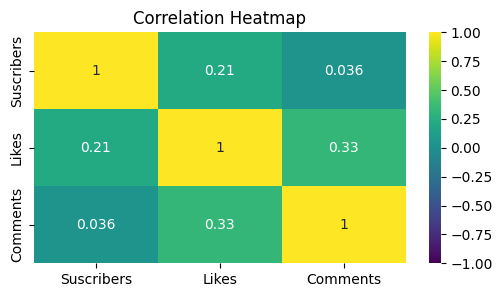

In [81]:
# Calculate the correlation matrix
correlation_matrix = youtubers_df[['Suscribers', 'Likes', 'Comments']].corr()
print(f'Correlation between Subscribers and Likes: {correlation_matrix}')

# Creating a heatmap to visually understand the structure
plt.figure(figsize=(6, 3))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# 3. AUDIENCE STUDY

In [82]:
# Analyse the distribution of streamers audience by country and Group the data by country and content category
country_category = youtubers_df.groupby(['Country', 'Categories']).size().unstack(fill_value=0)

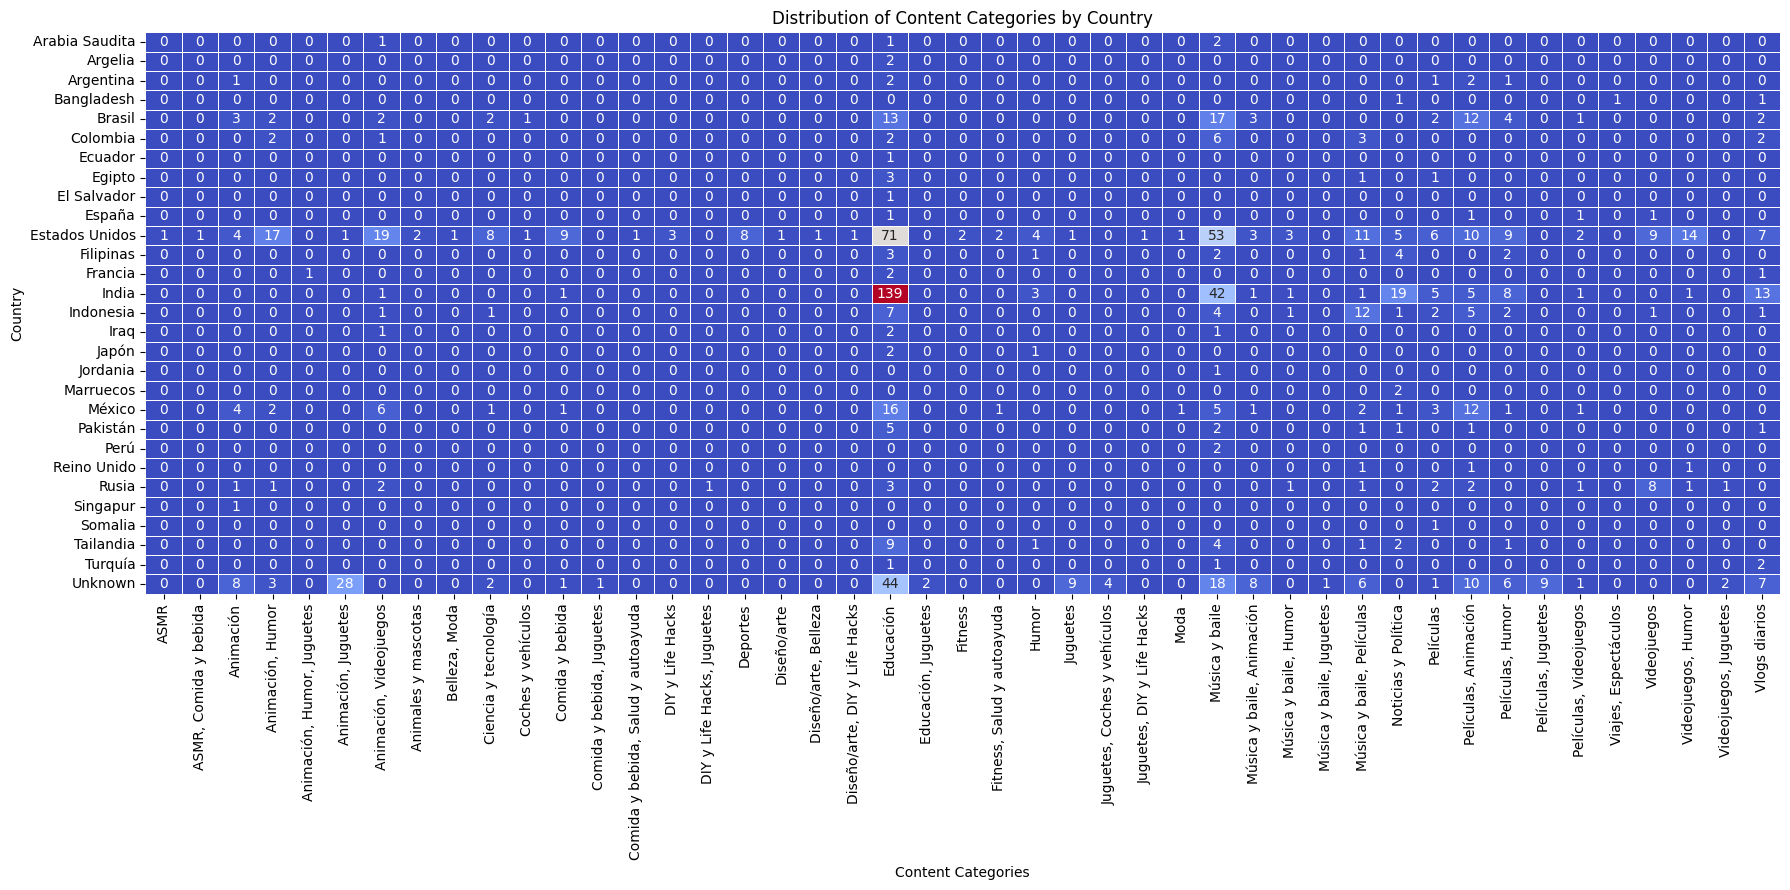

In [83]:
# Create a heatmap to visualize the distribution of content categories by country
plt.figure(figsize=(18,9))
sns.heatmap(country_category, cmap='coolwarm', annot=True, fmt='d', linewidths=0.5, cbar=False)
plt.title('Distribution of Content Categories by Country')
plt.xlabel('Content Categories')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

# 4. PERFORMANCE METRICS

In [84]:
# Calculate the average metrics
average_metrics = youtubers_df.groupby('Categories')[['Suscribers', 'Visits', 'Likes', 'Comments']].mean().reset_index()

In [85]:
# Create a Sunburst plot to visualize the metrics
import plotly.express as px
fig = px.sunburst(
    average_metrics,
    path=['Categories'],
    values='Suscribers',
    color='Visits',
    hover_data=['Likes', 'Comments'],
    color_continuous_scale='YlOrRd',  # You can change the color scale as needed
    title='Average Metrics by Content Categories',
)
fig.update_layout(width=1000, height=800)
fig.update_traces(textfont_size=14)
fig.show()

# 5. CONTENT CATEGORIES

In [86]:
# Count the number of streamers in each category
category_counts = youtubers_df['Categories'].value_counts()

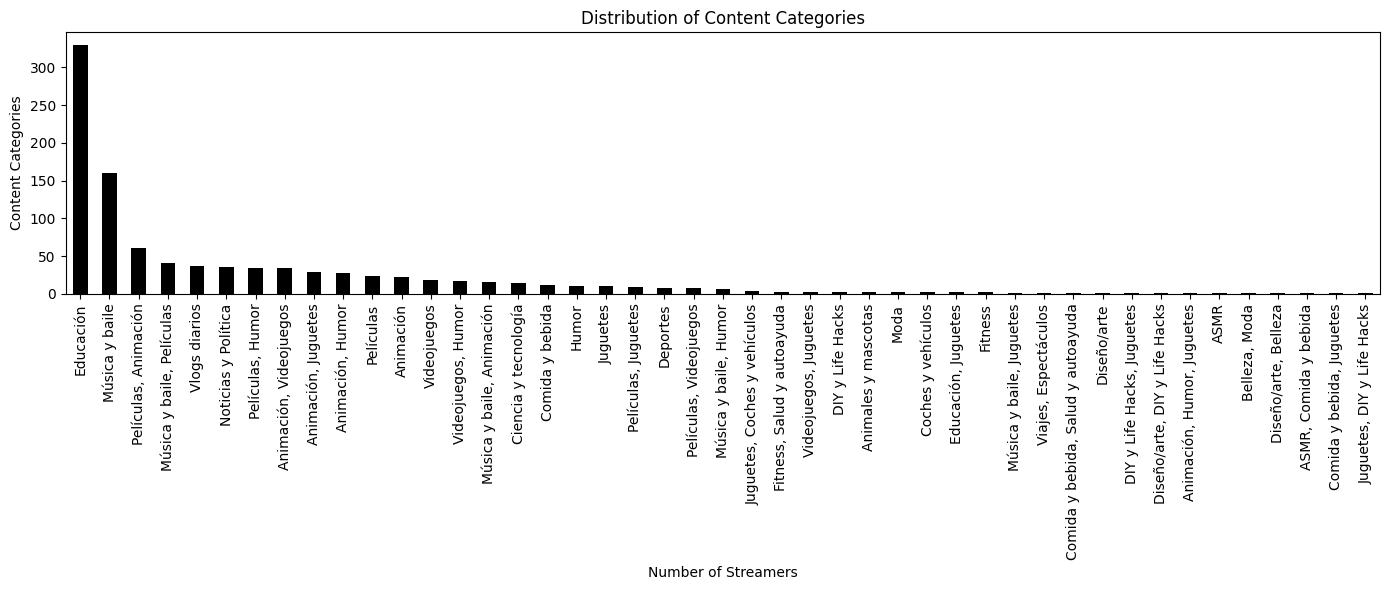

In [87]:
# Sort the categories by count in descending order
category_counts = category_counts.sort_values(ascending=False)

# Create a horizontal bar chart to visualize the distribution of content categories
plt.figure(figsize=(14, 6))
category_counts.plot(kind='bar', color='black')
plt.title('Distribution of Content Categories')
plt.xlabel('Number of Streamers')
plt.ylabel('Content Categories')
plt.tight_layout()
plt.show()

In [88]:
# Calculate average Likes and Comments for each category
N = 10
category_metrics = youtubers_df.groupby('Categories')[['Likes', 'Comments']].mean().reset_index()

# Sort categories by Likes in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Likes', ascending=False)

# Top N categories based on Likes
top_categories_likes = category_metrics.head(N)

# Sort categories by Comments in descending order to find the top-performing categories
category_metrics = category_metrics.sort_values(by='Comments', ascending=False)

# Top N categories based on Comments
top_categories_comments = category_metrics.head(N)

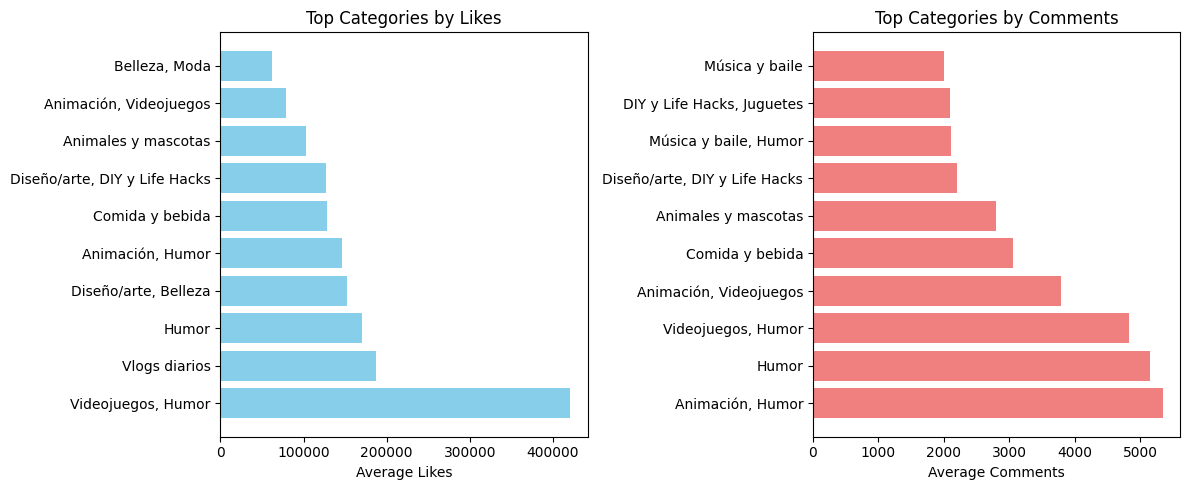

In [89]:
# Create subplots for Likes and Comments
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Plot Top N Categories by Likes
axes[0].barh(top_categories_likes['Categories'], top_categories_likes['Likes'], color='skyblue')
axes[0].set_xlabel('Average Likes')
axes[0].set_title('Top Categories by Likes')

# Plot Top N Categories by Comments
axes[1].barh(top_categories_comments['Categories'], top_categories_comments['Comments'], color='lightcoral')
axes[1].set_xlabel('Average Comments')
axes[1].set_title('Top Categories by Comments')

plt.tight_layout()
plt.show()

# 6. BRANDS AND COLLABORATION

In [90]:
# Calculate a performance metric (you can define your own formula)
youtubers_df['Performance'] = youtubers_df['Likes'] + youtubers_df['Comments']

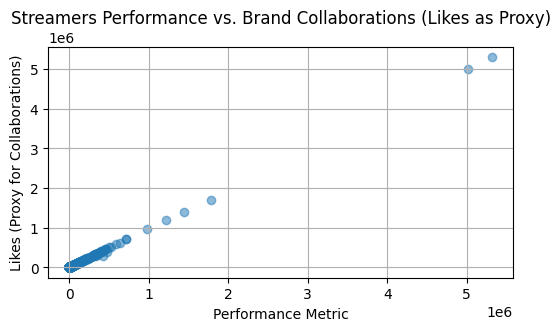

In [91]:
# Plot a scatter plot to visualize the relationship between performance and number of 'Likes' or 'Comments'
plt.figure(figsize=(6, 3))
plt.scatter(youtubers_df['Performance'], youtubers_df['Likes'], alpha=0.5)
plt.xlabel('Performance Metric')
plt.ylabel('Likes (Proxy for Collaborations)')
plt.title('Streamers Performance vs. Brand Collaborations (Likes as Proxy)')
plt.grid(True)
plt.show()

# 7. BENCHMARKING

In [92]:
# Calculate the average values for subscribers, visits, likes, and comments
average_subscribers = youtubers_df['Suscribers'].mean()
average_visits = youtubers_df['Visits'].mean()
average_likes = youtubers_df['Likes'].mean()
average_comments = youtubers_df['Comments'].mean()

In [93]:
# Filter the streamers with above-average performance in all categories
top_performers = youtubers_df[
    (youtubers_df['Suscribers'] > average_subscribers) &
    (youtubers_df['Visits'] > average_visits) &
    (youtubers_df['Likes'] > average_likes) &
    (youtubers_df['Comments'] > average_comments)
]

In [94]:
# Sort the top performers by a specific metric
top_performers = top_performers.sort_values(by='Suscribers', ascending=False)

# Display the top-performing content creators
print("Top-performing content creators:")
print(top_performers[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

Top-performing content creators:
                  Username   Suscribers       Visits      Likes  Comments
1                  MrBeast  183500000.0  117400000.0  5300000.0   18500.0
5                PewDiePie  111500000.0    2400000.0   197300.0    4900.0
26             dudeperfect   59700000.0    5300000.0   156500.0    4200.0
34             TaylorSwift   54100000.0    4300000.0   300400.0   15000.0
39             JuegaGerman   48600000.0    2000000.0   117100.0    3000.0
43                A4a4a4a4   47300000.0    9700000.0   330400.0   22000.0
58               Mikecrack   43400000.0    2200000.0   183400.0    1800.0
62          KimberlyLoaiza   42100000.0    5300000.0   271300.0   16000.0
64         luisitocomunica   41100000.0    2500000.0   128900.0    1800.0
70             JessNoLimit   39600000.0    1300000.0    73500.0    1600.0
96          TotalGaming093   36300000.0    1500000.0   129400.0    4900.0
98    TechnoGamerzOfficial   35600000.0    6200000.0   341800.0   16500.0
100  

# 8. CONTENT RECOMMENDATION

# **Autogenerated by model**

In [95]:
# Function to get content recommendations for a user
def get_content_recommendations(username, dataset):
    user_data = dataset[dataset['Username'] == username]
    if user_data.empty:
        return f"User '{username}' not found in the dataset."

    # Filter streamers from the same category and with higher performance
    recommendations = dataset[(dataset['Categories'] == user_data['Categories'].values[0]) &
                              (dataset['Performance'] > user_data['Performance'].values[0])]

    if recommendations.empty:
        return f"No recommendations found for user '{username}'."

    # Sort by performance and take the top recommendations
    recommendations = recommendations.sort_values(by='Performance', ascending=False)

    return recommendations['Username'].tolist()


In [96]:
# Get content recommendations for a user
user_recommendations = get_content_recommendations('TechnoGamerzOfficial', youtubers_df)
print("Recommended streamers for you:", user_recommendations)

Recommended streamers for you: ['Mythpat', '_vector_', 'alfredolarin', 'MRINDIANHACKER', 'khangsresearchcentre1685', 'ShortsBreak_Official', 'albert_cancook', 'gulshankalra07', 'BayashiTV_', 'mariano_razo', 'SusyMouriz', 'KarlaBustillos', 'TheMriDul']


# **As per user's requirement**

In [97]:
desired_category = input("Enter the desired  category: ")
min_subscribers = int(input("Enter the min no of subscribers: "))
min_visits = int(input("Enter the min no  of visits: "))
min_likes = int(input("Enter the min no  of likes: "))
min_comments = int(input("Enter the min no  of comments: "))
filtered_data = youtubers_df[
    (youtubers_df['Categories'] == desired_category) &
    (youtubers_df['Suscribers'] >= min_subscribers) &
    (youtubers_df['Visits'] >= min_visits) &
    (youtubers_df['Likes'] >= min_likes) &
    (youtubers_df['Comments'] >= min_comments)]

Enter the desired  category: Humor
Enter the min no of subscribers: 2
Enter the min no  of visits: 2
Enter the min no  of likes: 2
Enter the min no  of comments: 2


In [98]:
recommended_content = filtered_data.sort_values('Suscribers', ascending=False)
print(recommended_content[['Username', 'Suscribers', 'Visits', 'Likes', 'Comments']])

              Username  Suscribers      Visits      Likes  Comments
302         royaltyfam  21900000.0   4700000.0    67000.0    6600.0
341    triggeredinsaan  20400000.0  11100000.0  1400000.0   38000.0
358              React  20100000.0    133300.0     5400.0     214.0
693      ETVJabardasth  14300000.0     70800.0     1700.0       4.0
750  ZeinabHarakeVlogs  13800000.0   2800000.0    94000.0    3700.0
789           LofiGirl  13400000.0    139000.0     8500.0     132.0
853      FlowersComedy  12800000.0    101900.0     1000.0     169.0
933            SPDNOO1  12200000.0   1600000.0    62500.0     137.0
978          HikakinTV  11900000.0   2100000.0    51000.0    2300.0
989                cut  11700000.0    359000.0     8800.0     342.0
